<a href="https://colab.research.google.com/github/Bhushan271098/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Acquire and loading data**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# File path of dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataframe
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project 2/Copy of SeoulBikeData.csv', encoding = "ISO-8859-1")

# **Exploratory data analysis**

In [ ]:
# Checking length of data
len(dataset)

8760

In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking shape of data
dataset.shape

(8760, 14)

In [ ]:
# Columns present in data
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Info of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Data description
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
# Checking null values present in data
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Date columns to Date format conversion

dataset['Date']= pd.to_datetime(dataset['Date'])

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].apply(lambda x : x.month)
dataset['day_of_week'] = dataset['Date'].dt.day_name()
dataset['weekdays_weekend']=dataset['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=dataset.drop(columns=['Date','day_of_week'],axis=1)

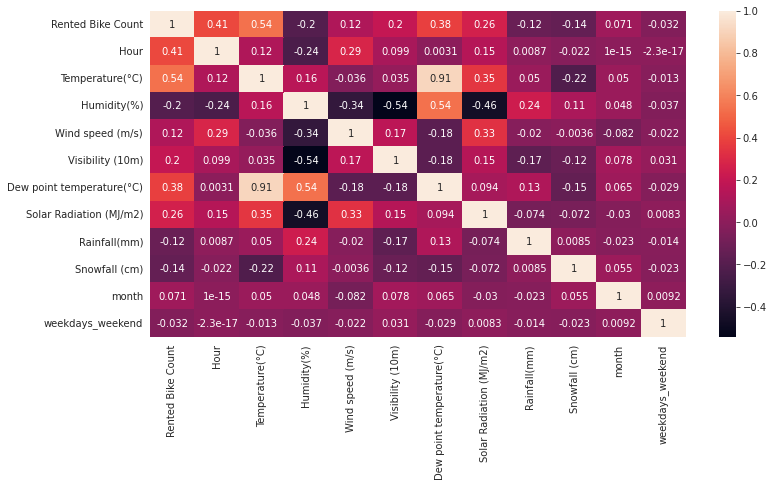

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

**Temperature and Dew point temperature are highly correlated.** 

**Positive correlation between rented bike count and temperature.**

**We see a negative correlation between rented bike count and humidity. The more the humidity, the less people prefer to bike.**



In [ ]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


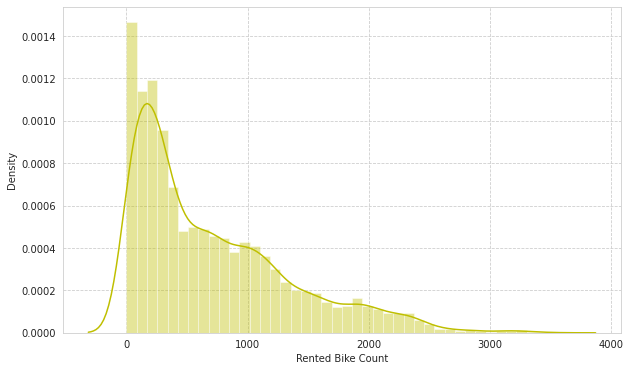

In [ ]:
# Visualization of distribution 
plt.figure(figsize=(10,6))
sns.distplot(df['Rented Bike Count'],color="y")

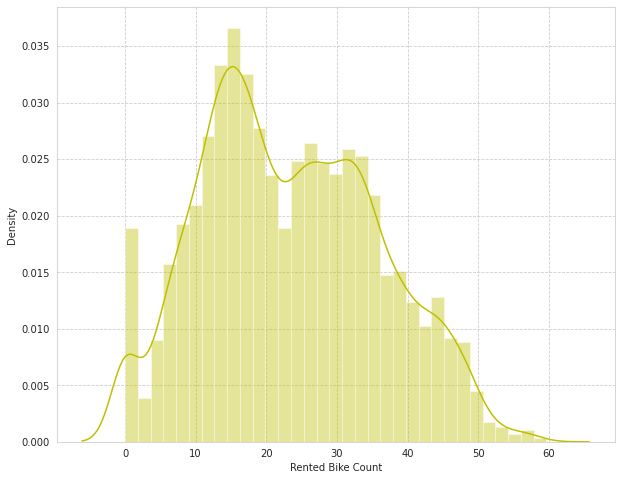

In [ ]:
# square_root transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']), color='y')

In [ ]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

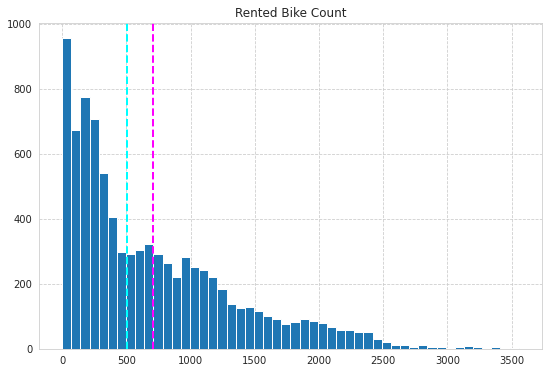

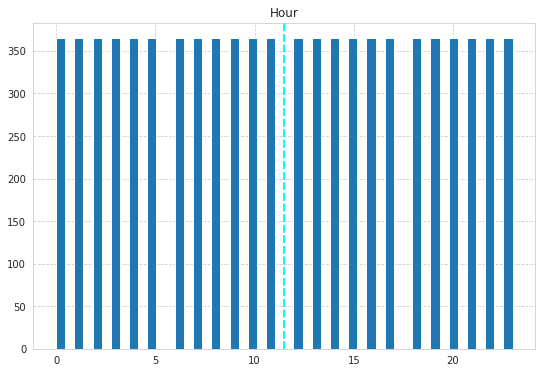

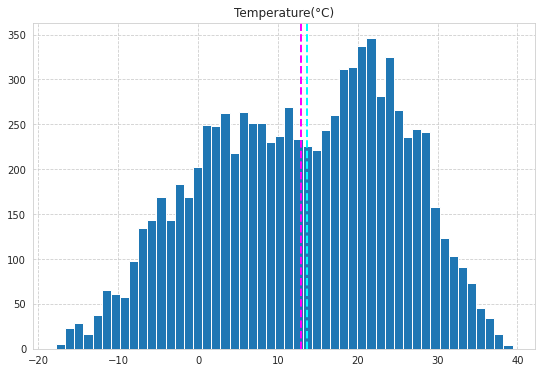

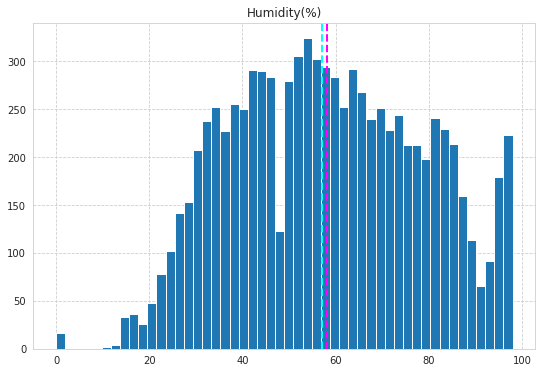

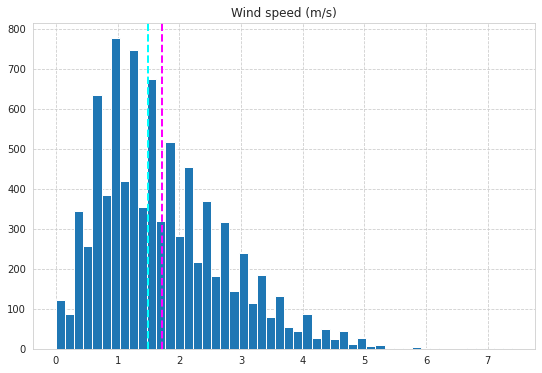

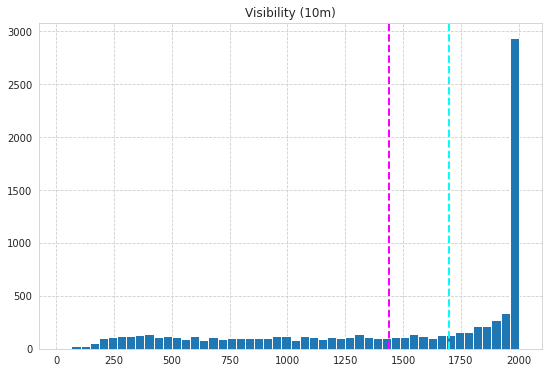

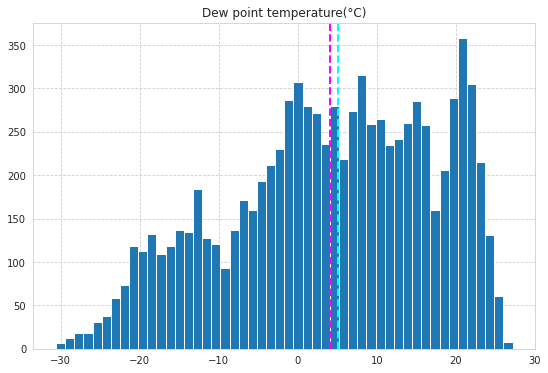

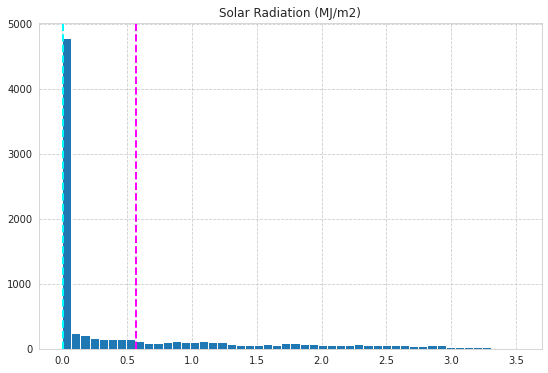

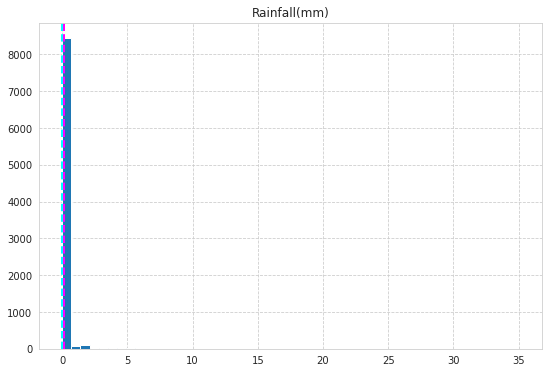

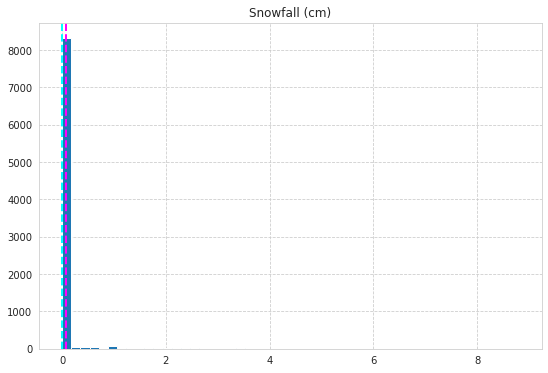

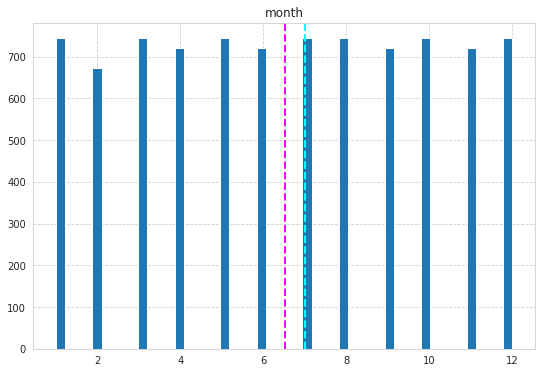

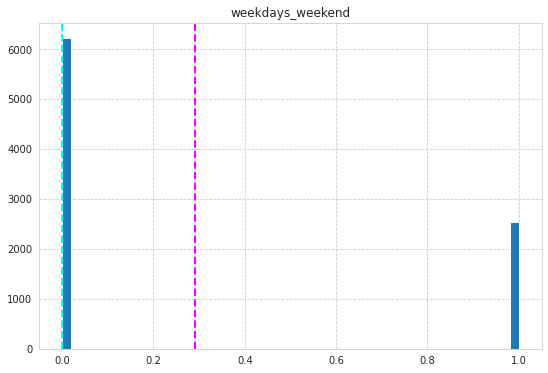

In [ ]:
# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

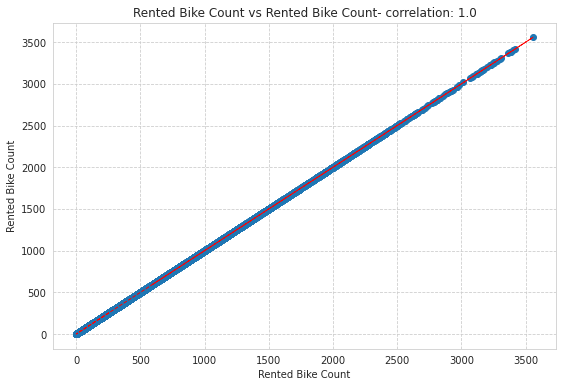

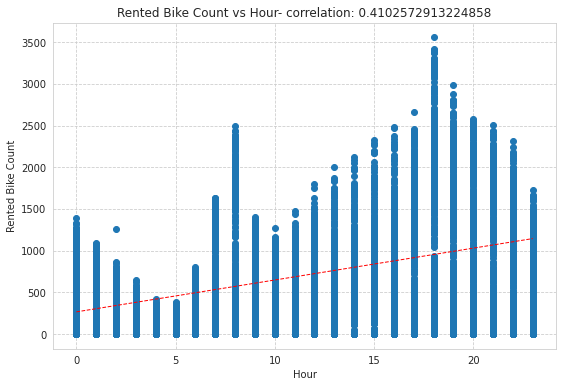

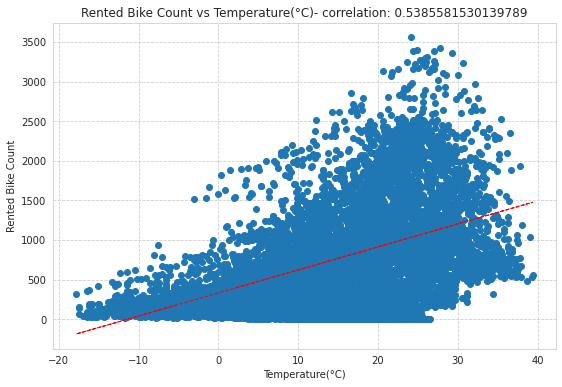

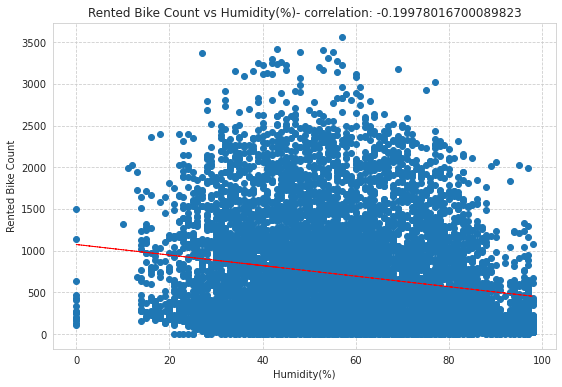

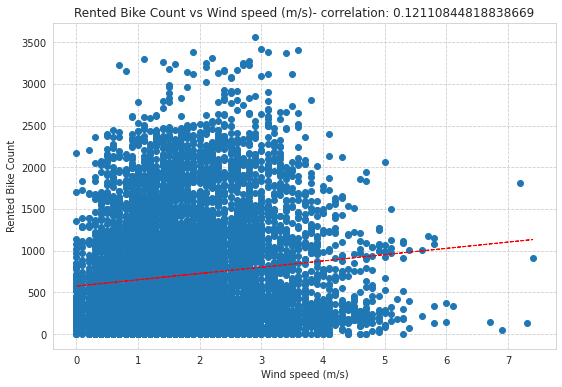

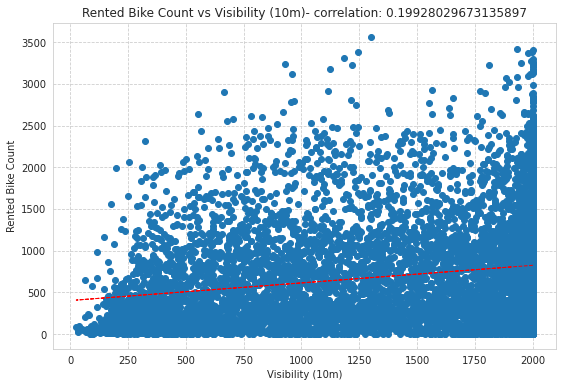

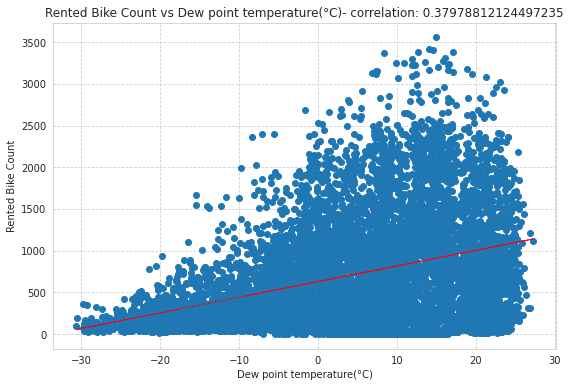

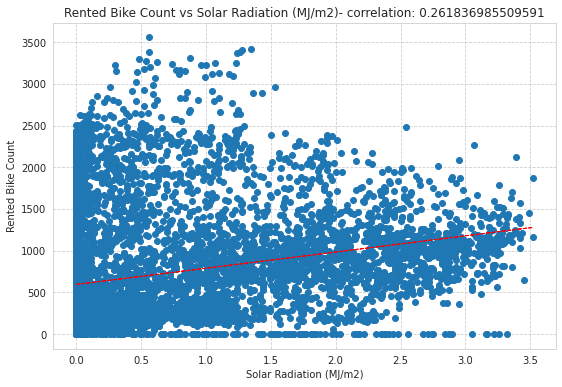

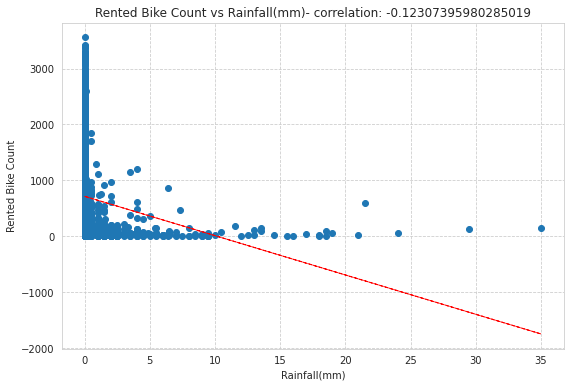

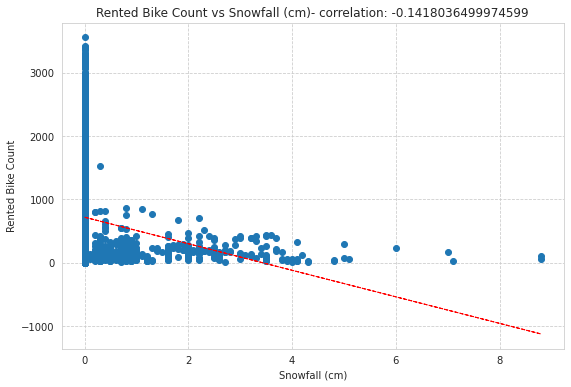

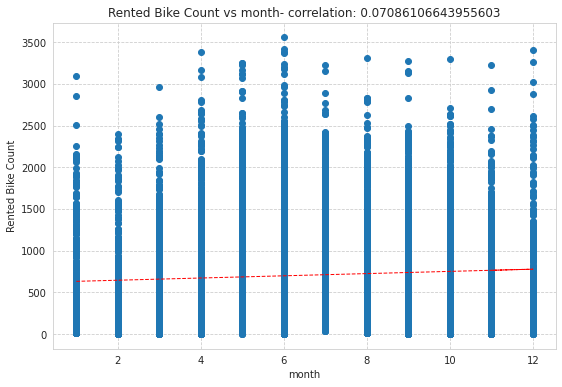

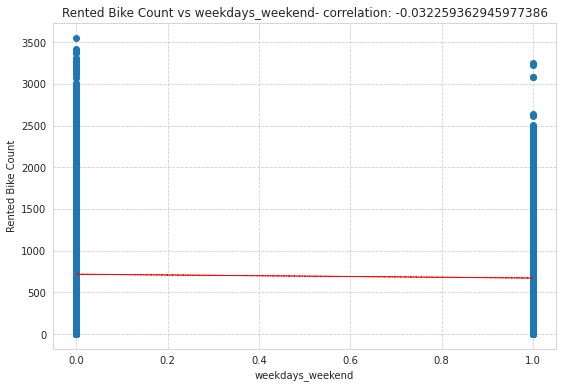

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**1.We see a strong positive correlation between  Rented bike count and temperature.**

**2.We see a strong negative correlation between  Rented bike count and humidity.**


In [ ]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [ ]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


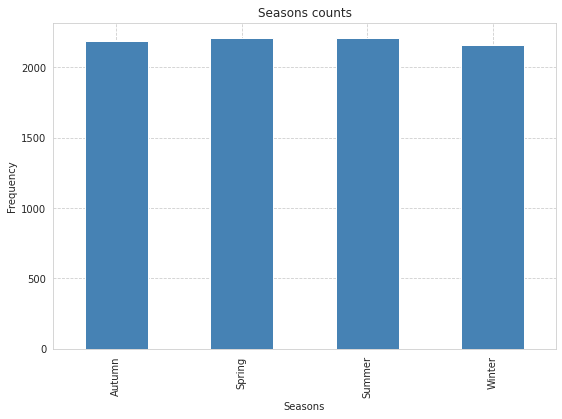

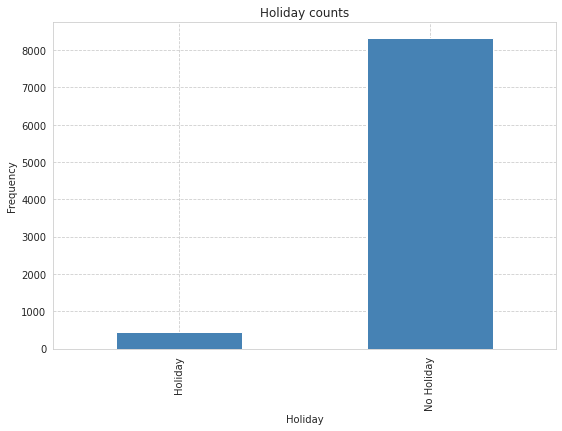

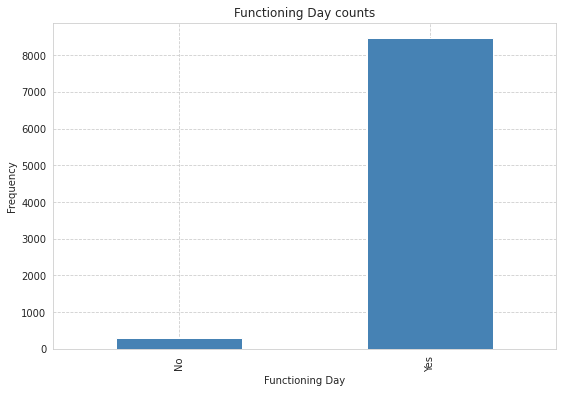

In [ ]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

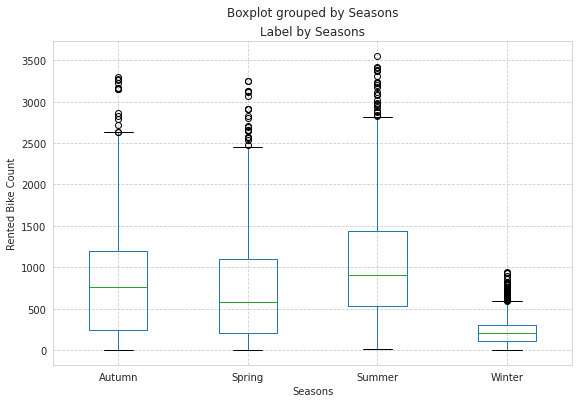

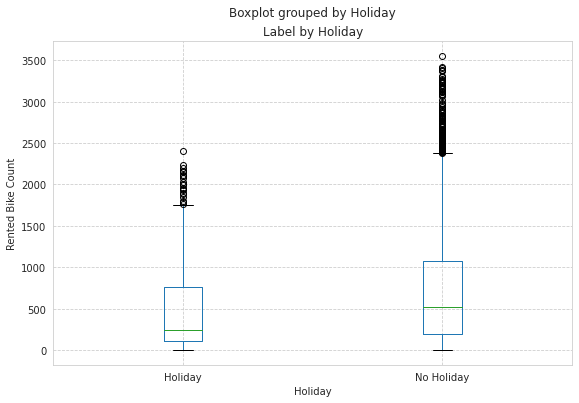

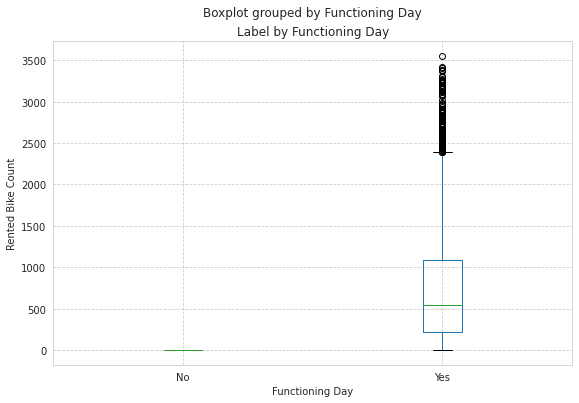

In [ ]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [ ]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

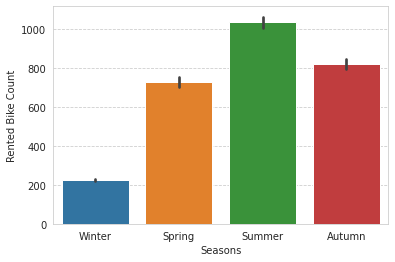

In [ ]:
#ploting bar plot for more info
sns.barplot(x = 'Seasons',y = 'Rented Bike Count',data = df)
plt.show()

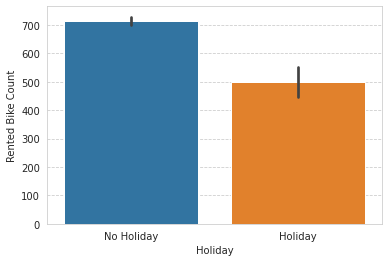

In [ ]:
#ploting bar plot for more info
sns.barplot(x = 'Holiday',y = 'Rented Bike Count',data = df)
plt.show()

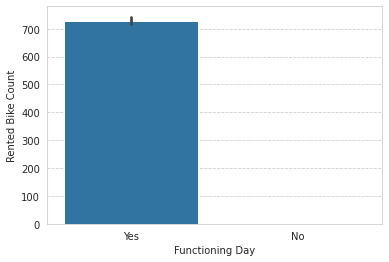

In [ ]:
#ploting bar plot for more info
sns.barplot(x = 'Functioning Day',y = 'Rented Bike Count',data = df)
plt.show()

**Conclusion**:

1. Bike reservations are highest during the Summer and least during the Spring season.

2. Slightly Higher demand for bikes during Non holidays.

3. Almost no demand for bikes on non functioning days.


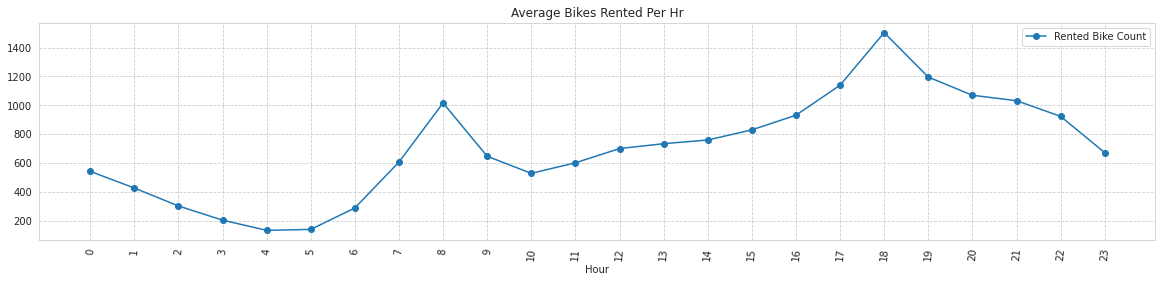

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

**Conclusion**:

1. Pattern shows there is a peak in the rentals at around 8am and another at around 6pm.

2. During office opening and closing time there is much high demand


In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [ ]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [ ]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [ ]:
#showing head of final df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [ ]:
final_df.shape

(8760, 17)

In [ ]:
#describing final DF
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


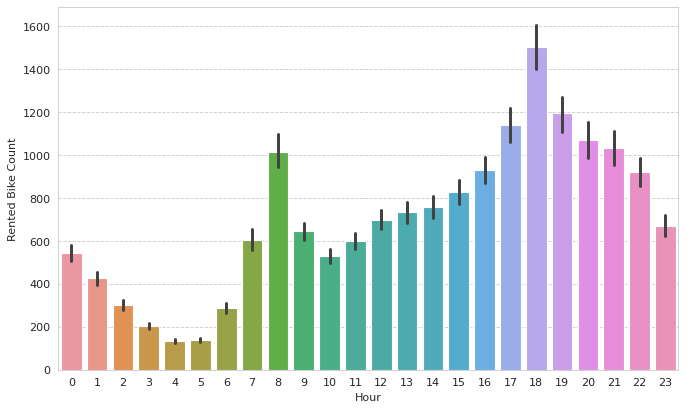

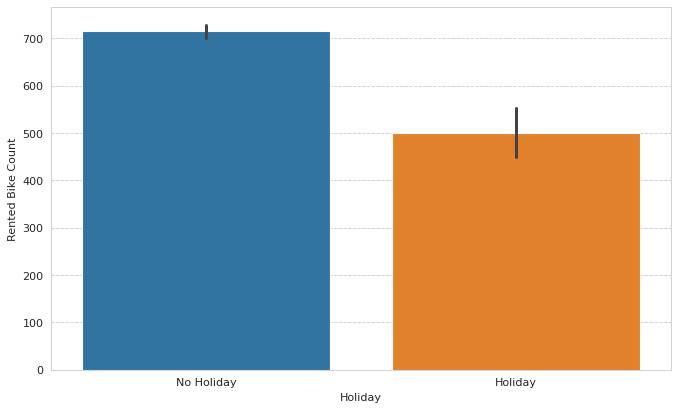

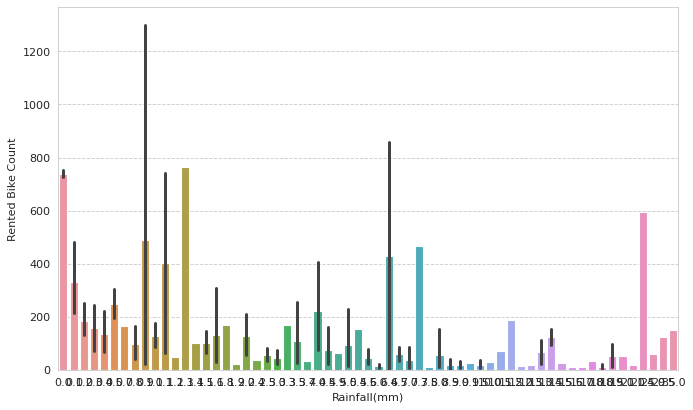

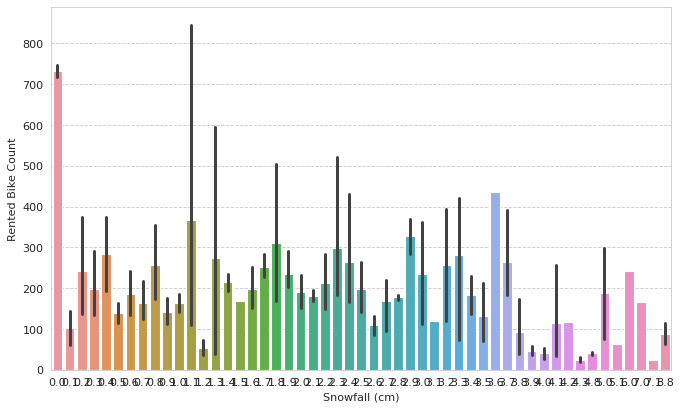

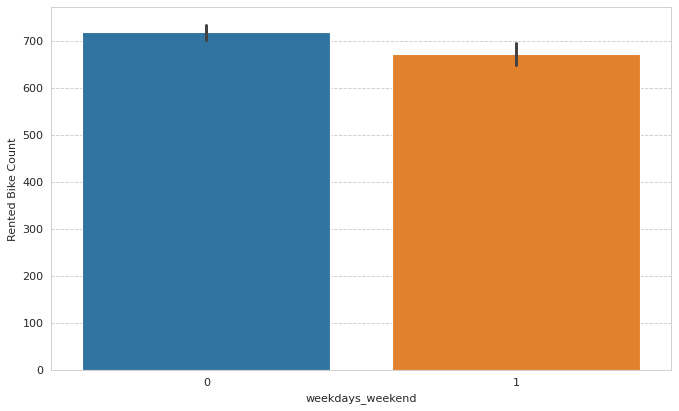

In [ ]:
# ploting bar plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,6),dpi=80)
  sns.barplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

**Conclusion:**
1. There is high demand of Rented bike between the office hours.
2. working days has comparatively high demand of rented bike as compared to non working day.
3. Rainfall increase demand of Rented Bike Decreases.
4. Snowfall increase demand of Rented Bike Decreases.

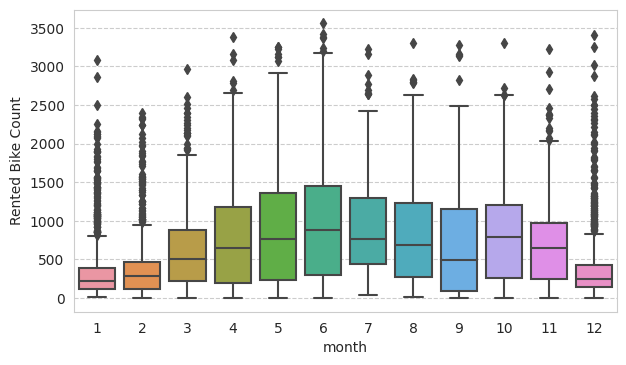

In [ ]:
# plotting boxplot Rented Bike Count vs Month
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=final_df)
plt.show()

**We can see that there is less demand for Rented bikes in the months of December, January, February i.e. during winter seasons. Also demand of bike is maximum during May, June, July i.e. Summer seasons.**

Text(0.5, 1.0, 'Square root')

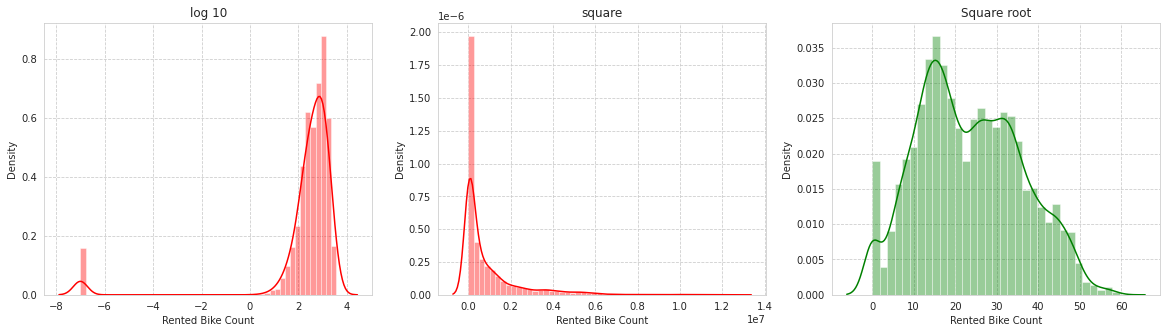

In [ ]:
# Transformation of distribution
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(final_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((final_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(final_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

# **Functions**

## Creating Function to train linear models and calculate scores

In [40]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [41]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## Creating function to run diffirent models

In [42]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## Creating function to get feature importance 

In [43]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## Lime

In [44]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=d6ac21f1c91d8176474631e15e26b2a321c762c162cc49749c9b81effde3bcf4
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [45]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)
